In [1]:
#load the required packages/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Binary Linear Regression (Logistic Regression)

We have discussed one Linear Regression model in this course, that is Normal Linear Regression model in which the response variable is Normally distributed. Another important and widely used type of linear model is Binary Linear Regression or "Logistic Regression" in which the response variable is a Binary (dichotomous)  variable. In such a model the response variable takes only two states for each member of the sample, for example it could be yes/no, 0/1, positive/negative, disease/no_disease, absent/present, etc. You see that such a variable can't be normally distributed so we need a different type of linear model to model it. 

This notebook is a brief introduction on how to fit a Logistic Regression model and assess it. Logistic Regression is also considered a classification technique in machine learning as it enables us to predict a binary response variable, therefore categorising the (current/future) observations in two categories of the response variable.

## Data

"This dataset is a stratified random sample from all active customers (at the end of June 2006) of a European financial services company. The dependent variable in this dataset is the churn behaviour of the customers in the period from July 1st until December 31th 2006. Here a churned customer is defined as someone who closed all their bank accounts with the company. All predictor variables are standardized. This dataset is a small subset of the dataset used by Benoit and Van den Poel (2013). The dataset is structured as a dataframe with 400 observations and 5 variables. " Source: https://www.rdocumentation.org/packages/bayesQR/versions/2.3/topics/Churn

The data frame has the following components:

    churn : churn (yes=1 / no=0)
    gender : gender of the customer (male=1 / female=0)
    Social_Class_Score : social class of the customer
    lor : length of relationship with the customer
    recency : number of days since last purchase
    
We aim to model the response variable `churn` (which only takes 0 or 1 values) to explain and predict the customer's behaviour in closing/keeping their bank accounts with this company using the provided predictors in the dataset. 

Let's look at the dataset and summary of its variables:


In [2]:
churndata = pd.read_csv("Churn-BayesQR-R.csv")
churndata

,Unnamed: 0,churn,gender,Social_Class_Score,lor,recency
0,4632,0,1,-0.115675,-1.089221,-0.721322
1,9695,0,0,-0.313425,1.182983,3.634435
2,14160,0,1,-1.325439,-0.846156,-0.427582
3,11016,0,1,1.966515,0.086942,-0.535672
4,16286,0,1,1.454692,-1.166642,-0.672640
...,...,...,...,...,...,...
395,761,1,1,0.617163,1.077655,0.878567
396,16865,1,0,-1.104424,-1.273770,-0.869016
397,6225,1,0,0.407781,-0.426195,0.684666
398,6187,1,1,-0.278528,0.818836,1.428091


In [4]:
churndata.describe()

,Unnamed: 0,churn,gender,Social_Class_Score,lor,recency
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,8635.430000,0.500000,0.495000,-0.052156,-0.034370,0.144549
std,4773.621405,0.500626,0.500601,1.083829,0.952936,1.103133
min,20.000000,0.000000,0.000000,-4.803510,-1.273770,-0.870666
25%,4876.000000,0.000000,0.000000,-0.688568,-0.828377,-0.645824
50%,8636.000000,0.500000,0.000000,-0.045881,-0.152072,-0.265036
75%,12554.750000,1.000000,1.000000,0.550277,0.544826,0.571214
max,16908.000000,1.000000,1.000000,3.432190,3.738312,5.928242


We make a `crosstab` table to see how many 0/1 there are in churn variable. In this case the number of each category's observations are equal but it is just a coincidence and the response doen't have to be like that. 

In [5]:
pd.crosstab(index=churndata['churn'], columns='count')

col_0,count
churn,
0,200
1,200


We can still fit a normal linear regression to this response variable and check the model's output. However, we know this is not correct and the model is not reliable because the response variable is not approximately normally distributed.

The predictor variable `gender` is a categorical variable, meaning that the two values it takes, 0 and 1, are not representing integer values of 0 and 1, but categories. So we wrap it in an uppercase C and parentheses () to indicate it is a categorical variable. It is common to describe categorical variables like this. For example, if you have a variable showing blood groups as A, B, AB and O and you want to include it in a model, whether the categories are shown with A, B, AB and O or 0,1,2,3, you can use the C(blood_type) in a model.

In [39]:
# fitting a normal linear regression model
nor_reg = smf.ols("churn ~ recency + C(gender) + Social_Class_Score + lor", data=churndata).fit()
nor_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  churn   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     8.444
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           1.52e-06
Time:                        16:54:11   Log-Likelihood:                -273.91
No. Observations:                 400   AIC:                             557.8
Df Residuals:                     395   BIC:                             577.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4865      0.035     14.022      0.000       0.418       0.555
C(gender)[T.1]        -0.0146      0.049     -0.301      0.764      -0.110       0.081
recency                0.1127      0.024      4.657      0.000       0.065       0.160
Social_Class_Score     0.0051      0.022      0.228      0.820      -0.039       0.049
lor                   -0.1388      0.028     -4.954      0.000      -0.194      -0.084
==============================================================================
Omnibus:                     2222.388   Durbin-Watson:                   0.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.961
Skew:                          -0.060   Prob(JB):                     1.42e-11
Kurtosis:                       1.273   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficeint of `C(gender)[T.1]` corresponds to level 1 of variable Gender which is "male". In case of having categorical predictors, the model is formulated separately for all different levels of that variable. Here we have:

For male customrs:    `churn = 0.49 - 0.01 + 0.11*recency + 0.01*Social_Class_Score - 0.14*lor`

For female customrs:  `churn = 0.49 + 0.11*recency + 0.01*Social_Class_Score - 0.14*lor`


Just to show how a normal linear model is not appropriate in this case, we plot the response variable against one of the predictors, recency, with a normal linear regression line. You see the response only takes 0,1 and the line is not explaining that very well. 

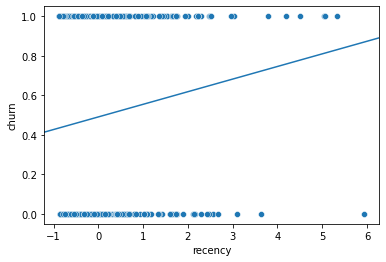

In [74]:
sns.scatterplot(x="recency", y="churn", data=churndata)
plt.axline(xy1=(0, nor_reg.params[0]), slope=nor_reg.params[1])
plt.show()

### Binary linear regression (logistic regression)

We can fit a model to this data that technically is still a linear model but we need to specify that the reponse variable is from a Binary (0/1) distribution. Therefore, we use the `logit` function from `statsmodels.formula.api`. 

In [3]:
# Fitting a logistic regression model
log_reg = smf.logit("churn ~ recency + C(gender) + Social_Class_Score + lor", data=churndata).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.651007
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                 0.06080
Time:                        15:42:45   Log-Likelihood:                -260.40
converged:                       True   LL-Null:                       -277.26
Covariance Type:            nonrobust   LLR p-value:                 8.537e-07
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0827      0.151     -0.547      0.585      -0.379       0.214
C(gender)[T.1]        -0.0651      0.210     -0.311      0.756      -0.476       0.346
recency                0.5085      0.114      4.462      0.000       0.285       0.732
Social_Class_Score     0.0185      0.096      0.193      0.847      -0.169       0.206
lor                   -0.6434      0.140     -4.607      0.000      -0.917      -0.370
======================================================================================
"""

Summary of the model is similar to that of a normal regression. The predictors `recency` and `lor` have significant coefficients in the model. However, the interpretation of the coefficients is different from that of a normal linear model because a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) is involved in this model to fit a curve to the response variable based on the predictors. 

The general formula of a logistic model with two predictors is: log(P(Y=1)/P(Y=0)) = a + b_1* x_1 + b_2* X_2

log(P(Y=1)/P(Y=0)) is the log-odds or logit of the probability that the dependent variable Y takes on the value 1 (success or the event of interest) relative to the probability that it takes on the value 0 (failure or the complement of the event of interest). P(Y=1)/P(Y=0) is the odds of Y taking place.


In a logistic regression, we need to calculate the [Odds Ratio](https://en.wikipedia.org/wiki/Odds_ratio) of predictors by taking `exp` of their coefficients. Then:

- OR=1 implies that a one-unit change in X_i has no effect on the odds of the event occurring. In other words, X_i has no influence on the event's probability.
- OR>1  suggests that a one-unit increase in X_i is associated with an increase in the odds of the event occurring. The larger the OR, the greater the impact. (With one unit increase in X_i, the odds of the response occuring multiplies by exp(b_i), and in this case b_i is positive).
- OR<1  indicates that a one-unit increase in X_i is associated with a decrease in the odds of the event occurring. The closer the OR is to 0, the stronger the negative impact. (With one unit increase in X_i, the odds of the response occuring multiplies by exp(b_i), and in this case b_i is negative.)

In [5]:
# calculating Odds Ratios and their confidence intervals
coefficients = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(coefficients)
print(odds_ratios)

                          OR  Lower CI  Upper CI
Intercept           0.920644  0.684444  1.238355
C(gender)[T.1]      0.936948  0.621377  1.412783
recency             1.662831  1.329933  2.079058
Social_Class_Score  1.018678  0.844187  1.229236
lor                 0.525493  0.399649  0.690964


The predictors `recency` and `lor` have significant coefficients in this model. OR of `recency` (number of days since last purchase) is larger than 1, it means that increasing this predictor increases the odds of response being equal to 1 or customer churning (closing their accounts). OR of `lor` (length of relationship with the customer) is smaller than 1, it means that increasing this predictor decreases the odds of response being equal to 1 or customer churning (closing their accounts). 

## Model assessment

The model assessment methods we discussed for normal linear regression, don't usually apply here. Instead we explore how good our model predicts the binary (0/1) response variable. We will use the `predict` function, which predicts the probability of the response being equal to 1. Then if this probability is larger than 0.5, the prediction is 1 and if it is smaller than or equal to 0.5, the prediction is 0. This way we predict the response variable in 0 and 1. (It is possible to change the threshold of 0.5 to another value to maximise the prediction accuracy of the model, using [Roc curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)). 

We apply `predict` to all the  observations, and report howmany 0s have been predicted as 0 or 1, and howmany 1s have been predicted as 0 or 1.

In [6]:
actual_response = churndata["churn"]
predicted_response = np.round(log_reg.predict()) # <=0.5 -> 0
outcomes = pd.DataFrame({"actual_response": actual_response, "predicted_response": predicted_response})
print(outcomes.value_counts(sort=False))

actual_response  predicted_response
0                0.0                   102
                 1.0                    98
1                0.0                    55
                 1.0                   145
dtype: int64


### Confusion matrix
We can also calculate the Specificity, Sensitivity, False Positive and False Negative of the model's prediction. The function `pred_table` provides the frequencies we generated before, in a matrix, called a confusion matrix. This model has correctly predicted 62% of the response variable observations, and performs better in predicting true positives than true negatives.

In [7]:
conf_matrix = log_reg.pred_table()
print(conf_matrix)

[[102.  98.]
 [ 55. 145.]]


In [9]:
TN = conf_matrix[0,0] #true negatives
TP = conf_matrix[1,1] #true positives
FN = conf_matrix[1,0] #false negatives
FP = conf_matrix[0,1] #false positive
[TN, TP, FN, FP]

[102.0, 145.0, 55.0, 98.0]

In [10]:
accuracy = (TN + TP) / (TN + TP + FN + FP) # accuracy of model's prediction
sensitivity = TP / (FN + TP) # sensitivity of the model-the proportion of actual positive cases that were correctly identified by the model.
specificity = TN / (TN + FP) # specificity of the model-the proportion of actual negative cases that were correctly identified by the model
print("accuracy: ", accuracy)
print("sensitivity: ", sensitivity) 
print("specificity: ", specificity) 

accuracy:  0.6175
sensitivity:  0.725
specificity:  0.51


### Train and Test data and Cross Validation

Here we fitted a model to all the 400 observations and predicted the same 400 observations to assess the prediction power of the model. However, in practice it is common to split the data into two groups of Training and Testing. For example 80% of the dataset could be randomly selected as the Training part and the other 20% could be the Testing part. Then the model is built only using the training data. Afterwards, the model is used for predicting the response variable in the testing part of the dataset. This way the model predicts values that were not fed into it in the model-making step and therefore provides a better measurement of how good its prediction power is.  

This process can be further improved in k-fold [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics). "In k-fold cross-validation, the original sample is randomly partitioned into k equal-sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. "